<ipython-input-1-15df863df7d1>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-1-15df863df7d1>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

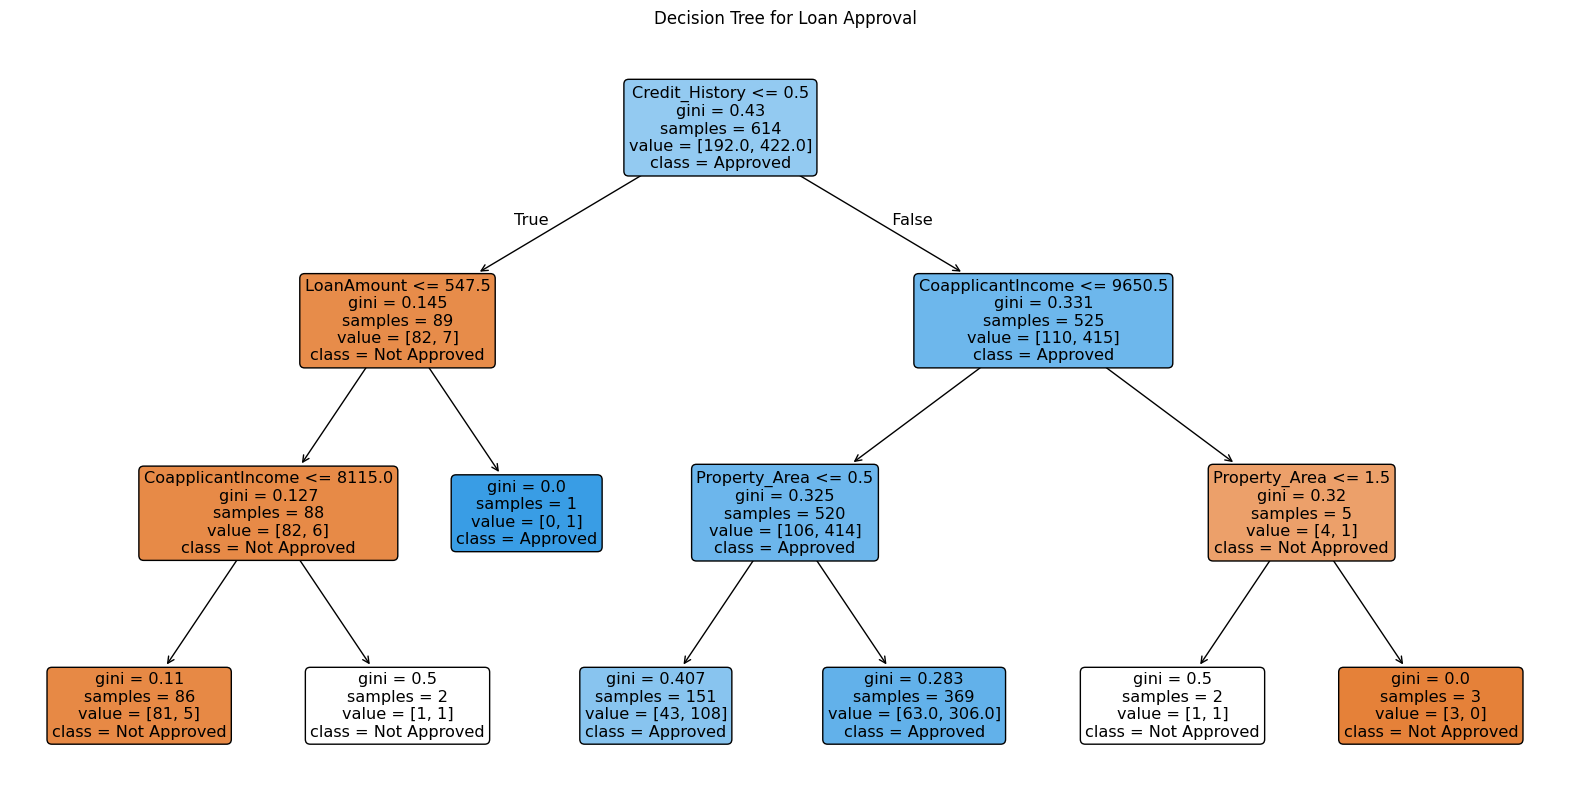


Feature Importance:
CoapplicantIncome: 0.0495
LoanAmount: 0.0198
Credit_History: 0.8915
Property_Area: 0.0392

Example Prediction:
Prediction: Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Load and preprocess data
def preprocess_data(df):
    # Fill missing values
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

    # Convert categorical to numerical
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Dependents'] = df['Dependents'].replace('3+', 3)
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
    df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

    return df

# Load datasets
train_df = pd.read_csv('loan_sanction_train.csv')
test_df = pd.read_csv('loan_sanction_test.csv')

# Preprocess data
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# 2. Prepare features
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
           'Loan_Amount_Term', 'Credit_History', 'Property_Area']

X_train = train_df[features]
y_train = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# 3. Create and train decision tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# 4. Make predictions
predictions = dt_model.predict(test_df[features])

# 5. Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=features,
          class_names=['Not Approved', 'Approved'],
          filled=True,
          rounded=True)
plt.title('Decision Tree for Loan Approval')
plt.show()

# 6. Print feature importance
print("\nFeature Importance:")
for feature, importance in zip(features, dt_model.feature_importances_):
    if importance > 0.01:  # Only show important features
        print(f"{feature}: {importance:.4f}")

# 7. Save predictions
test_df['Predicted_Loan_Status'] = predictions
test_df[['Loan_ID', 'Predicted_Loan_Status']].to_csv('loan_predictions.csv', index=False)

# 8. Function to predict new cases
def predict_loan(features_input):
    prediction = dt_model.predict([features_input])
    return "Approved" if prediction[0] == 1 else "Not Approved"

# Example prediction
print("\nExample Prediction:")
example = test_df[features].iloc[0]
print(f"Prediction: {predict_loan(example)}")

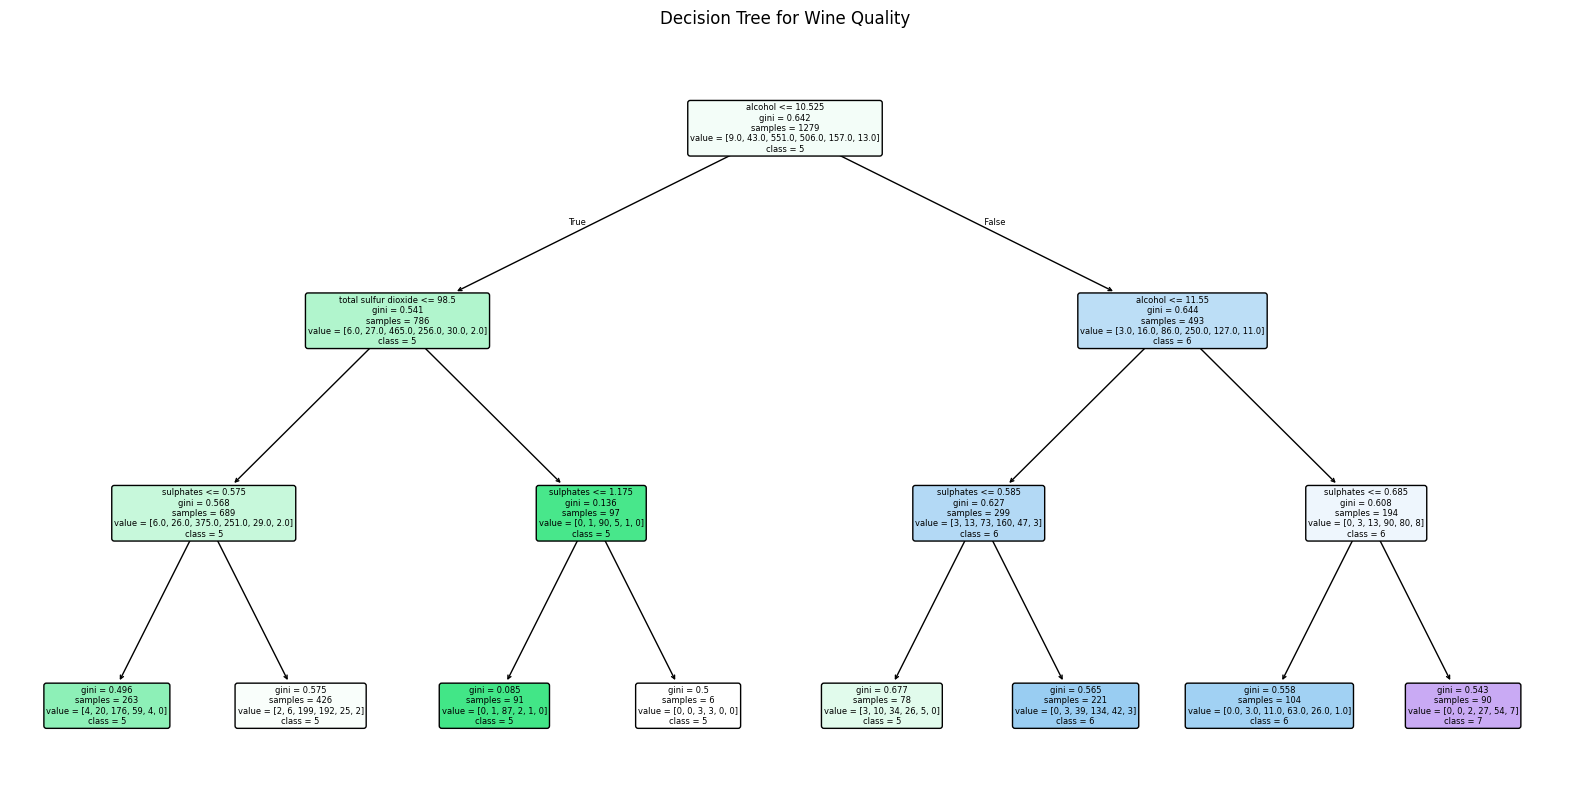


Wine Quality Feature Importance:
total sulfur dioxide: 0.1400
sulphates: 0.2625
alcohol: 0.5975

Wine Prediction Accuracy: 0.528125


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

################### WINE QUALITY DATASET ###################
# 1. Load wine data
wine_df = pd.read_csv('winequality-red.csv')

# 2. Prepare features for wine
X_wine = wine_df.drop('quality', axis=1)
y_wine = wine_df['quality']

# 3. Split wine data
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42)

# 4. Create and train wine decision tree
wine_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
wine_dt.fit(X_wine_train, y_wine_train)

# 5. Make wine predictions
wine_predictions = wine_dt.predict(X_wine_test)

# 6. Visualize wine decision tree
plt.figure(figsize=(20,10))
plot_tree(wine_dt,
          feature_names=X_wine.columns,
          class_names=[str(x) for x in wine_dt.classes_],
          filled=True,
          rounded=True)
plt.title('Decision Tree for Wine Quality')
plt.show()

# 7. Print wine feature importance
print("\nWine Quality Feature Importance:")
for feature, importance in zip(X_wine.columns, wine_dt.feature_importances_):
    if importance > 0.01:
        print(f"{feature}: {importance:.4f}")

# 8. Wine prediction function
def predict_wine_quality(features):
    prediction = wine_dt.predict([features])
    return prediction[0]

print("\nWine Prediction Accuracy:",
      wine_dt.score(X_wine_test, y_wine_test))

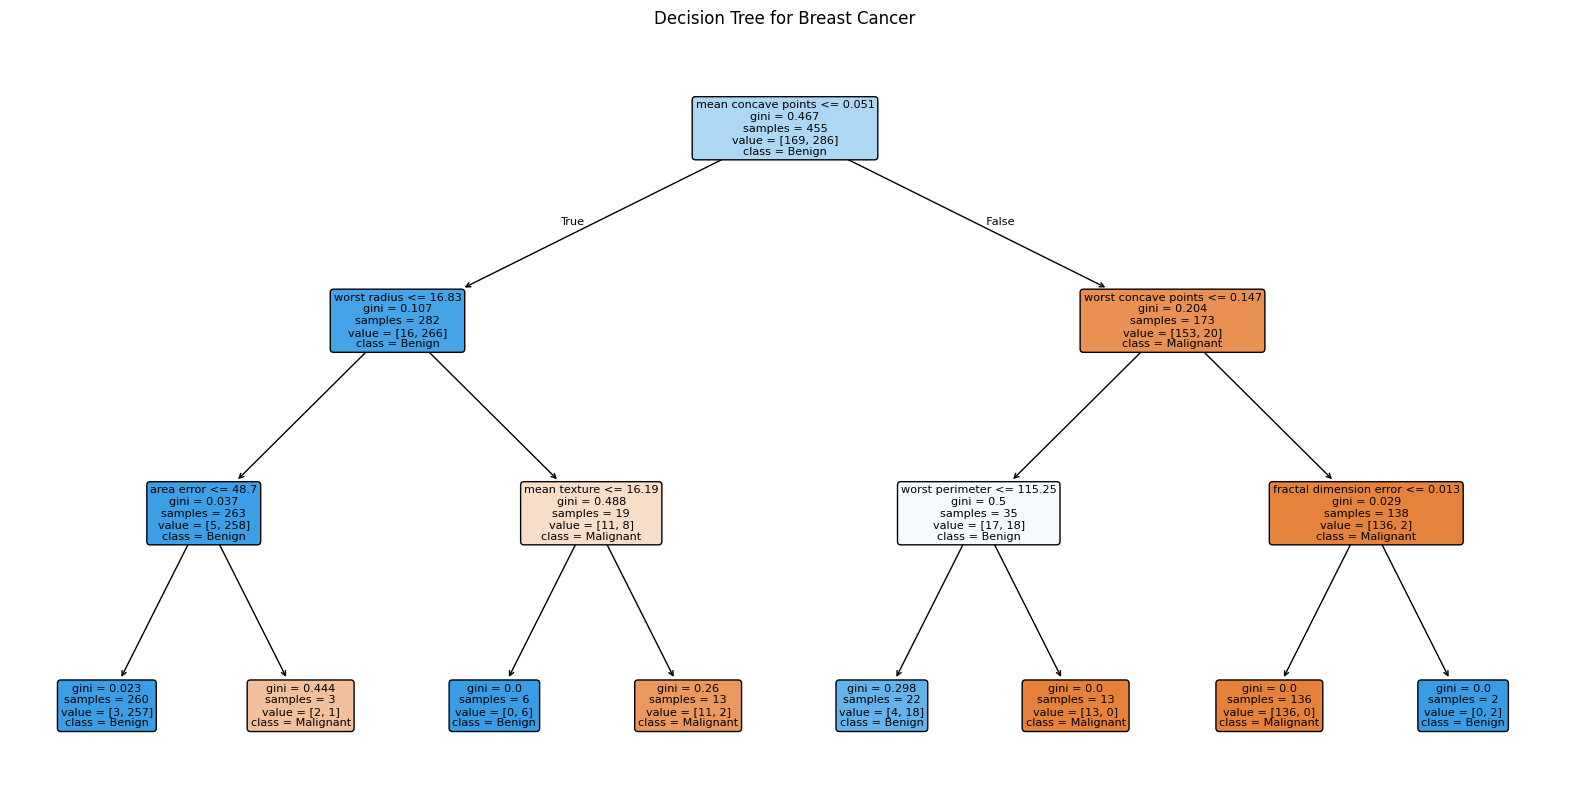


Breast Cancer Feature Importance:
mean texture: 0.0301
mean concave points: 0.7523
area error: 0.0130
fractal dimension error: 0.0202
worst radius: 0.0569
worst perimeter: 0.0560
worst concave points: 0.0714

Cancer Prediction Accuracy: 0.9473684210526315

Example Predictions:
Wine Quality Example:
Predicted Quality: 5

Breast Cancer Example:
Prediction: Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


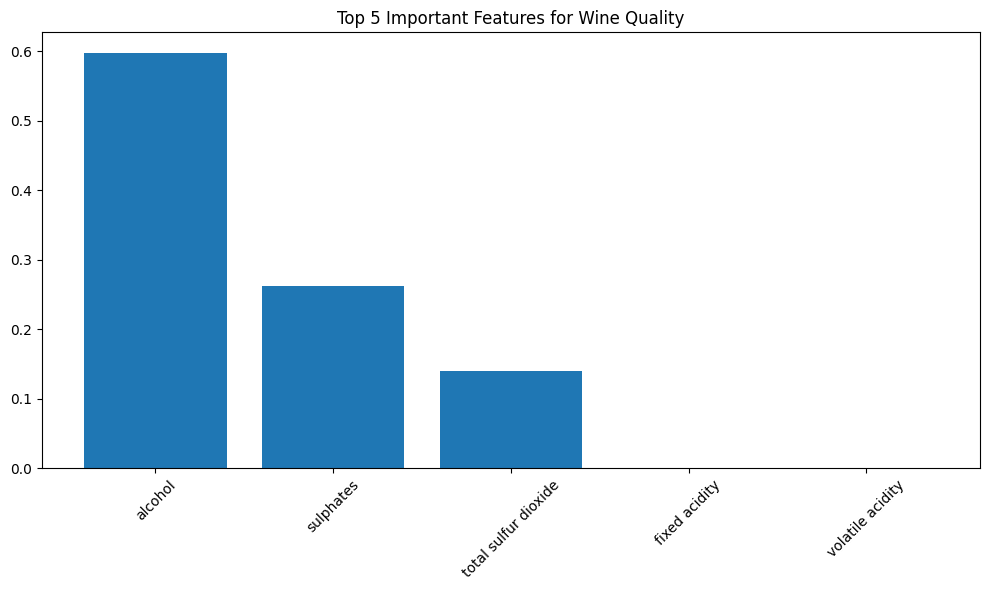

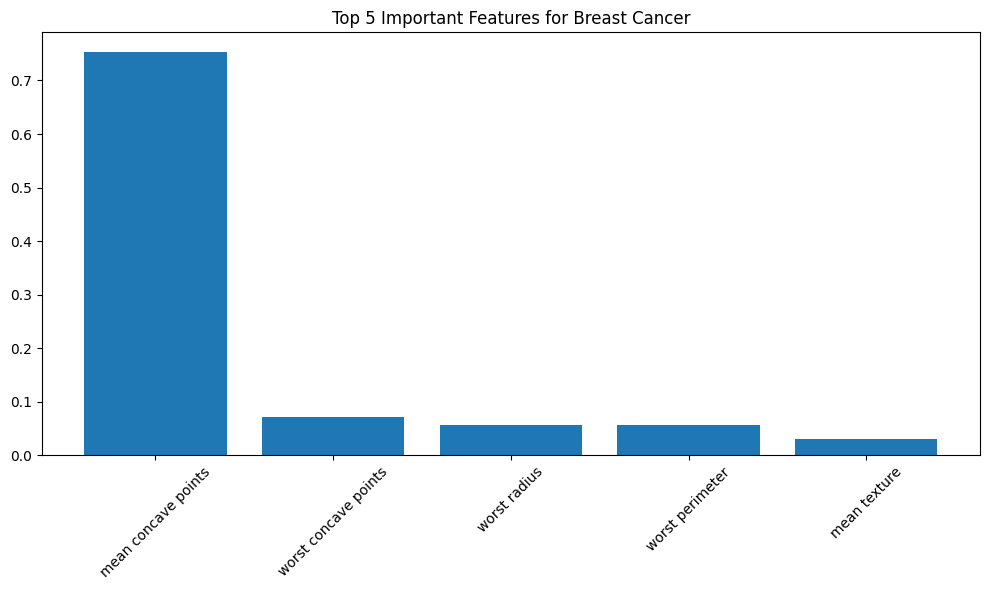

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 2. Prepare features for cancer
X_cancer = cancer_df
y_cancer = cancer.target

# 3. Split cancer data
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42)

# 4. Create and train cancer decision tree
cancer_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
cancer_dt.fit(X_cancer_train, y_cancer_train)

# 5. Make cancer predictions
cancer_predictions = cancer_dt.predict(X_cancer_test)

# 6. Visualize cancer decision tree
plt.figure(figsize=(20,10))
plot_tree(cancer_dt,
          feature_names=cancer.feature_names,
          class_names=['Malignant', 'Benign'],
          filled=True,
          rounded=True)
plt.title('Decision Tree for Breast Cancer')
plt.show()

# 7. Print cancer feature importance
print("\nBreast Cancer Feature Importance:")
for feature, importance in zip(cancer.feature_names, cancer_dt.feature_importances_):
    if importance > 0.01:
        print(f"{feature}: {importance:.4f}")

# 8. Cancer prediction function
def predict_cancer(features):
    prediction = cancer_dt.predict([features])
    return "Benign" if prediction[0] == 1 else "Malignant"

print("\nCancer Prediction Accuracy:",
      cancer_dt.score(X_cancer_test, y_cancer_test))

# Example predictions
print("\nExample Predictions:")
print("Wine Quality Example:")
wine_example = X_wine_test.iloc[0]
print(f"Predicted Quality: {predict_wine_quality(wine_example)}")

print("\nBreast Cancer Example:")
cancer_example = X_cancer_test.iloc[0]
print(f"Prediction: {predict_cancer(cancer_example)}")

# Additional visualizations
def plot_feature_importance(model, feature_names, title):
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    importances = importances.sort_values('importance', ascending=False)

    plt.figure(figsize=(10,6))
    plt.bar(importances['feature'][:5], importances['importance'][:5])
    plt.xticks(rotation=45)
    plt.title(f'Top 5 Important Features for {title}')
    plt.tight_layout()
    plt.show()

# Plot feature importance for both datasets
plot_feature_importance(wine_dt, X_wine.columns, 'Wine Quality')
plot_feature_importance(cancer_dt, cancer.feature_names, 'Breast Cancer')